In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

COLUMNS = ['Status','Duration','Credit History','Purpose','Credit Amount','Saving Account', 'Present Employment Since',
           'Rate','Status and Sex','Debtors/Guarantors','Residence Since','Property','Age','Plans','Housing','Number',
           'Job','Number of people','Telephone','Foreing Worker','Apt']
data = pd.read_csv("german.data", delimiter = ' ', names = COLUMNS)
data.head()

,Status,Duration,Credit History,Purpose,Credit Amount,Saving Account,Present Employment Since,Rate,Status and Sex,Debtors/Guarantors,...,Property,Age,Plans,Housing,Number,Job,Number of people,Telephone,Foreing Worker,Apt
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


## *Número de instancias y atributos:*

In [2]:
shape = data.shape
print(f"Número de instancias: {shape[0]}")
print(f"Número de atributos: {shape[1]}")

Número de instancias: 1000
Número de atributos: 21


### *El conjunto de datos está etiquetado con la variable de clase Apt

In [3]:
data.dtypes

Status                      object
Duration                     int64
Credit History              object
Purpose                     object
Credit Amount                int64
Saving Account              object
Present Employment Since    object
Rate                         int64
Status and Sex              object
Debtors/Guarantors          object
Residence Since              int64
Property                    object
Age                          int64
Plans                       object
Housing                     object
Number                       int64
Job                         object
Number of people             int64
Telephone                   object
Foreing Worker              object
Apt                          int64
dtype: object

In [7]:
data['Apt'] = data['Apt'].astype('object')
columns_Cat = data.select_dtypes(exclude='int64').columns
columns_Cat

Index(['Status', 'Credit History', 'Purpose', 'Saving Account',
       'Present Employment Since', 'Status and Sex', 'Debtors/Guarantors',
       'Property', 'Plans', 'Housing', 'Job', 'Telephone', 'Foreing Worker',
       'Apt'],
      dtype='object')

In [4]:
import json
def leer_JSON():
    with open('data base.json', 'r') as archivo:
        return json.load(archivo)

In [5]:
myDict = leer_JSON()

In [8]:
for nameCol in columns_Cat:
    for key in data[nameCol].unique():
        value = myDict[nameCol][str(key)]
        data[nameCol] = data[nameCol].replace(key, value)       
data.head()

,Status,Duration,Credit History,Purpose,Credit Amount,Saving Account,Present Employment Since,Rate,Status and Sex,Debtors/Guarantors,...,Property,Age,Plans,Housing,Number,Job,Number of people,Telephone,Foreing Worker,Apt
0,A,6,Critico,radio/tv,1169,sin cuenta,Mayor que 6,4,mujer sol,ninguno,...,bienes raices,67,ninguno,propio,2,empleado,1,si,si,Bueno
1,B,48,Algunos reembolsados,radio/tv,5951,Menor de 100,entre 1 y 4,2,mujer DSC,ninguno,...,bienes raices,22,ninguno,propio,1,empleado,1,no,si,Malo
2,D,12,Critico,education,2096,Menor de 100,entre 4 y 7,2,mujer sol,ninguno,...,bienes raices,49,ninguno,propio,1,no calificado,2,no,si,Bueno
3,A,42,Algunos reembolsados,furniture/equipment,7882,Menor de 100,entre 4 y 7,2,mujer sol,fiador,...,seguro de vida,45,ninguno,gratis,1,empleado,2,no,si,Bueno
4,A,24,Retrasado,Carro nuevo,4870,Menor de 100,entre 1 y 4,3,mujer sol,ninguno,...,Sin propiedad,53,ninguno,gratis,2,empleado,2,no,si,Malo


### Cantidad de atributos númerico y categoricos

In [9]:
categorico = data.select_dtypes(exclude='int64').columns
numerico = data.select_dtypes(exclude='object').columns
print("Variables categoricas: ", len(categorico))
print("Variables númericas: ", len(numerico))

Variables categoricas:  14
Variables númericas:  7


### Moda de atributos categoricos

In [10]:
data.select_dtypes(exclude='int64').mode()

,Status,Credit History,Purpose,Saving Account,Present Employment Since,Status and Sex,Debtors/Guarantors,Property,Plans,Housing,Job,Telephone,Foreing Worker,Apt
0,D,Algunos reembolsados,radio/tv,Menor de 100,entre 1 y 4,mujer sol,ninguno,carro u otro,ninguno,propio,empleado,no,si,Bueno


### Media, rango y desviación estandar de cada atributo numérico

In [97]:
data.describe()

,Duration,Credit Amount,Rate,Residence Since,Age,Number,Number of people
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [11]:
#rango
data.select_dtypes(include='int64').apply(lambda x: max(x)-min(x))

Duration               68
Credit Amount       18174
Rate                    3
Residence Since         3
Age                    56
Number                  3
Number of people        1
dtype: int64

### Distribción de las clases

Text(0.5, 1.0, 'Recuento de Personas Clasificadas')

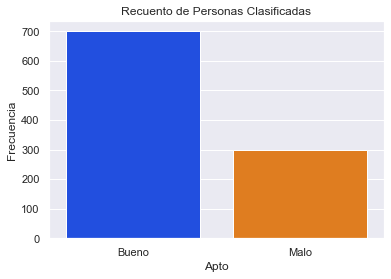

In [12]:
sb.set()
sb.countplot(x="Apt", data=data, palette='bright')
plt.xlabel("Apto")
plt.ylabel("Frecuencia")
plt.title("Recuento de Personas Clasificadas")


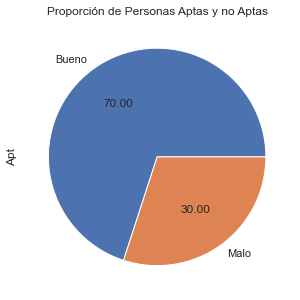

In [13]:
plot = data['Apt'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(5, 5),
                                       title='Proporción de Personas Aptas y no Aptas')
plt.show()

### Detección de datos atipicos

In [14]:
data.isna().sum()

Status                      0
Duration                    0
Credit History              0
Purpose                     0
Credit Amount               0
Saving Account              0
Present Employment Since    0
Rate                        0
Status and Sex              0
Debtors/Guarantors          0
Residence Since             0
Property                    0
Age                         0
Plans                       0
Housing                     0
Number                      0
Job                         0
Number of people            0
Telephone                   0
Foreing Worker              0
Apt                         0
dtype: int64

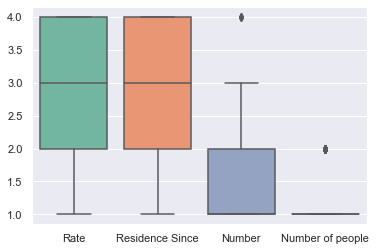

In [15]:
ax = sb.boxplot(data=data[['Rate', 'Residence Since', 'Number', 'Number of people']],
                orient="v", palette="Set2")

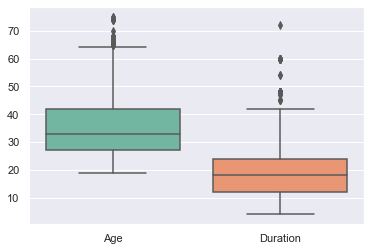

In [16]:
ax = sb.boxplot(data=data[['Age', 'Duration']],
                orient="v", palette="Set2")

## Datos numéricos a Categoricos

In [49]:
col_Num = data.select_dtypes(include='int64').columns
print(data[col_Num].min())
print(data[col_Num].max())

Duration              4
Credit Amount       250
Rate                  1
Residence Since       1
Age                  19
Number                1
Number of people      1
dtype: int64
Duration               72
Credit Amount       18424
Rate                    4
Residence Since         4
Age                    75
Number                  4
Number of people        2
dtype: int64


In [55]:
#Tecnica de Discretización 'Duration', 'Credit Amount', 'Rate', 'Residence Since', 'Age', 'Number', Number of people'
data2 = data.copy()
bins = np.array([0, 12, 17, 30, 60, 70]) 
labels = np.array(['niño', 'adolescente', 'joven', 'adulto', 'adulto mayor'])
data2['Age'] = pd.cut(data['Age'], bins, labels = labels)
data2.head(3)

,Status,Duration,Credit History,Purpose,Credit Amount,Saving Account,Present Employment Since,Rate,Status and Sex,Debtors/Guarantors,...,Property,Age,Plans,Housing,Number,Job,Number of people,Telephone,Foreing Worker,Apt
0,A,6,Critico,radio/tv,1169,sin cuenta,Mayor que 6,4,mujer sol,ninguno,...,bienes raices,adulto mayor,ninguno,propio,2,empleado,1,si,si,Bueno
1,B,48,Algunos reembolsados,radio/tv,5951,Menor de 100,entre 1 y 4,2,mujer DSC,ninguno,...,bienes raices,joven,ninguno,propio,1,empleado,1,no,si,Malo
2,D,12,Critico,education,2096,Menor de 100,entre 4 y 7,2,mujer sol,ninguno,...,bienes raices,adulto,ninguno,propio,1,no calificado,2,no,si,Bueno


## Datos Categoricos a Numéricos

In [19]:
for col in columns_Cat:
    print(f"{col}: ",data[col].unique())

Status:  ['A' 'B' 'D' 'C']
Credit History:  ['Critico' 'Algunos reembolsados' 'Retrasado' 'No tiene'
 'Todos reembolsados']
Purpose:  ['radio/tv' 'education' 'furniture/equipment' 'Carro nuevo' 'Carro usado'
 'Negocios' 'uso domestico' 'repairs' 'otros' 'retraining']
Saving Account:  ['sin cuenta' 'Menor de 100' 'entre 500 y 1000' 'mayor que 999'
 'entre 100 y 500']
Present Employment Since:  ['Mayor que 6' 'entre 1 y 4' 'entre 4 y 7' 'desempleado' 'menor que 1']
Status and Sex:  ['mujer sol' 'mujer DSC' 'hombre DS' 'hombre CV']
Debtors/Guarantors:  ['ninguno' 'fiador' 'co-applicant']
Property:  ['bienes raices' 'seguro de vida' 'Sin propiedad' 'carro u otro']
Plans:  ['ninguno' 'Banco' 'tiendas']
Housing:  ['propio' 'gratis' 'alquilada']
Job:  ['empleado' 'no calificado' 'independiente' 'desempleado']
Telephone:  ['si' 'no']
Foreing Worker:  ['si' 'no']
Apt:  ['Bueno' 'Malo']


In [20]:
data2 = pd.get_dummies(data2, columns = columns_Cat)
data2

,Duration,Credit Amount,Rate,Residence Since,Age,Number,Number of people,Status_A,Status_B,Status_C,...,Job_desempleado,Job_empleado,Job_independiente,Job_no calificado,Telephone_no,Telephone_si,Foreing Worker_no,Foreing Worker_si,Apt_Bueno,Apt_Malo
0,6,1169,4,4,67,2,1,1,0,0,...,0,1,0,0,0,1,0,1,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,0,0,0,1,1,0,0,1,1,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,1,0,0,1,0,0,1,1,0
4,24,4870,3,4,53,2,2,1,0,0,...,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,12,1736,3,4,31,1,1,0,0,0,...,0,0,0,1,1,0,0,1,1,0
996,30,3857,4,4,40,1,1,1,0,0,...,0,0,1,0,0,1,0,1,1,0
997,12,804,4,4,38,1,1,0,0,0,...,0,1,0,0,1,0,0,1,1,0
998,45,1845,4,4,23,1,1,1,0,0,...,0,1,0,0,0,1,0,1,0,1


## Discretización de Varibales Numéricas

In [48]:
from sklearn import preprocessing as pr
dis = pr.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
edad = dis.fit_transform(data[['Age']])
edad = pd.DataFrame(edad)
edad = edad.rename(columns= {0:'Age'})
edad.groupby('Age')['Age'].count()


Age
0.0    411
1.0    332
2.0    161
3.0     68
4.0     28
Name: Age, dtype: int64

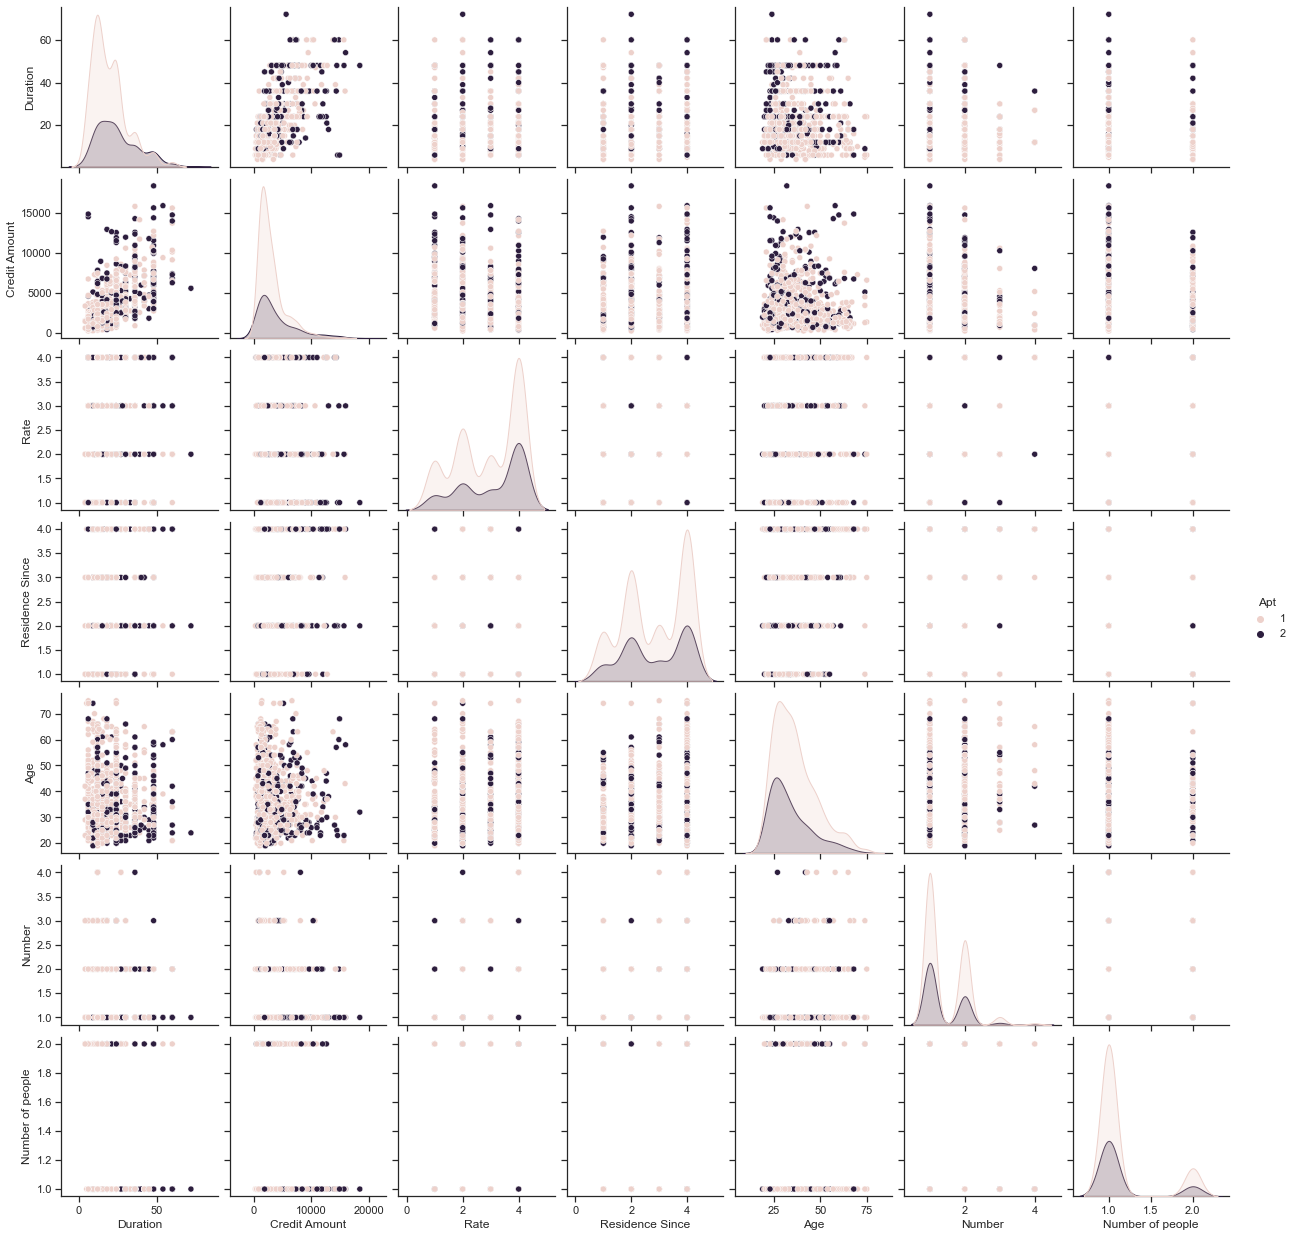

In [96]:
sb.set_theme(style="ticks")
sb.pairplot(data, hue="Apt")

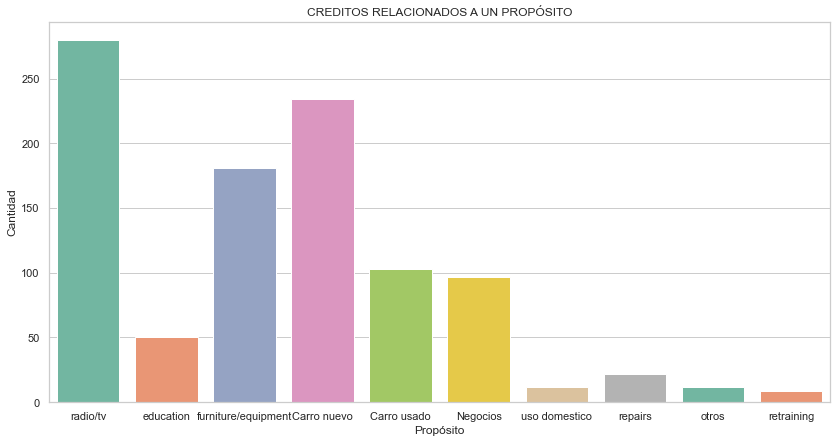

In [113]:
#Relación entre prestamo y propósito
plt.figure(figsize=(14,7))
sb.countplot(x = data['Purpose'], data = data, palette="Set2")
plt.xlabel("Propósito")
plt.ylabel("Cantidad")
plt.title("CREDITOS RELACIONADOS A UN PROPÓSITO")
plt.show()

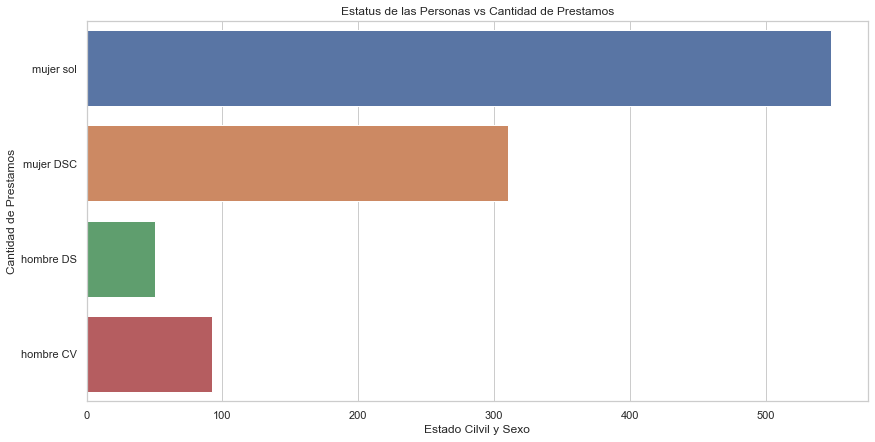

In [121]:
#Estatus de las personas que solicitan un prestamo
plt.figure(figsize=(14,7))
sb.countplot(y = data['Status and Sex'], data = data)
plt.ylabel("Estado Cilvil y Sexo")
plt.xlabel("Cantidad de Prestamos")
plt.title("Estatus de las Personas vs Cantidad de Prestamos")
plt.show()

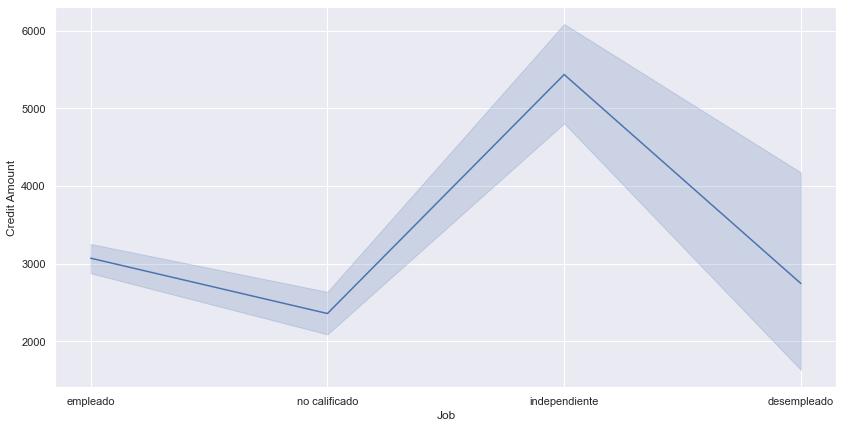

In [57]:
#Perfil de las personas que realizan prestamos mas y menos costosos
plt.figure(figsize=(14,7))
ax = sb.lineplot(x = data['Job'], y = data['Credit Amount'])